Index(['Days', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

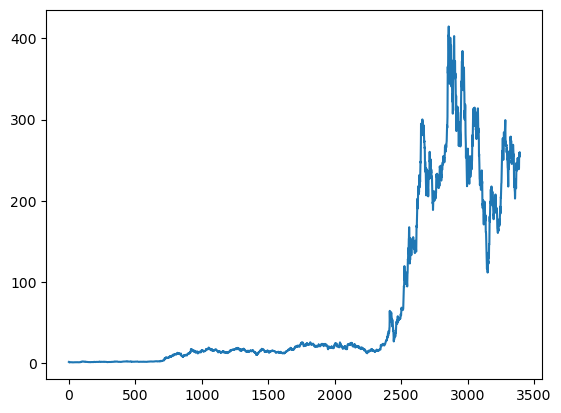

In [4]:
# #graphing nasdaq data
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time


#read csv
df = pd.read_csv("TSLA - Full.csv")

fig, ax = plt.subplots() 

#create days column
days = []
for i in range(len(df["Date"])):
    days.append(i)
df.insert(0, "Days", days, True)

#graph data
x = df["Days"]
y = df["High"]



ax.plot(x, y)

#plt.show()

df.columns


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Assuming df contains historical stock price data with columns 'Days' and 'High'

# Extract features and target variable
X_nasdaq = df[['Days']]
y_nasdaq = df['High']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_nasdaq, y_nasdaq, train_size=0.8, test_size=0.2, random_state=0)

# Initialize polynomial features
poly = PolynomialFeatures(degree=3)  # Adjust degree as needed

# Transform features to capture non-linear relationships
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

# Initialize and train the Bayesian Ridge regression model
bayesian_ridge = BayesianRidge(n_iter=300)
bayesian_ridge.fit(X_train_poly, y_train)

# Make predictions
pred_train = bayesian_ridge.predict(X_train_poly)
pred_valid = bayesian_ridge.predict(X_valid_poly)

# Evaluate the model
train_r2 = r2_score(y_train, pred_train)
valid_r2 = r2_score(y_valid, pred_valid)
print("Training R-squared score:", train_r2)
print("Validation R-squared score:", valid_r2)
print(mean_squared_error(y_valid, pred_valid))


Training R-squared score: 0.7643301025449956
Validation R-squared score: 0.7894071086810373
2215.418343743925


c:\Users\rijul\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


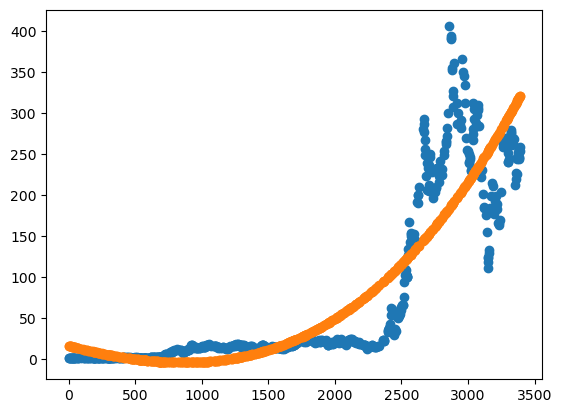

In [6]:
# Graph results for nasdaq
fig, ax = plt.subplots() 
ax.scatter(X_valid, y_valid)
ax.scatter(X_valid, pred_valid)
plt.show()

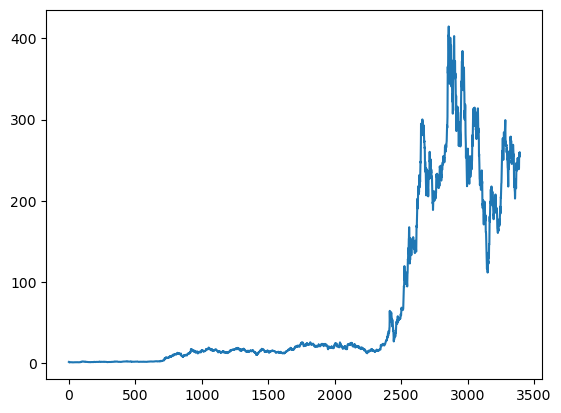

In [7]:
#test for snp500
df2 = pd.read_csv("TSLA - Full.csv")

fig, ax = plt.subplots() 

#create days column
days = []
for i in range(len(df2["Date"])):
    days.append(i)
df2.insert(0, "Days", days, True)


#graph data
x = df2["Days"]
y = df2["High"]

ax.plot(x, y)




In [8]:
# Extract features and target variable
X = df2[['Days']]
y = df2['High']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Initialize polynomial features
poly = PolynomialFeatures(degree=5)  # Adjust degree as needed

# Transform features to capture non-linear relationships
X_train_poly = poly.fit_transform(X_train)
X_valid_poly= poly.transform(X_valid)

# # Initialize and train the Bayesian Ridge regression model
#bayesian_ridge = BayesianRidge(n_iter=300)
bayesian_ridge.fit(X_train_poly, y_train)

# Make predictions
pred_train = bayesian_ridge.predict(X_train_poly)
pred_valid = bayesian_ridge.predict(X_valid_poly)

# Evaluate the model
train_r2 = r2_score(y_train, pred_train)
valid_r2 = r2_score(y_valid, pred_valid)
print("Training R-squared score:", train_r2)
print("Validation R-squared score:", valid_r2)

Training R-squared score: 0.8599548528188047
Validation R-squared score: 0.8664356819453534


c:\Users\rijul\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


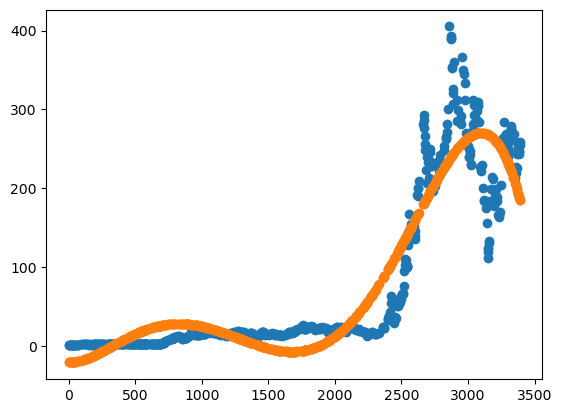

In [9]:
#Graph results
fig, ax = plt.subplots() 
ax.scatter(X_valid, y_valid)
ax.scatter(X_valid, pred_valid)
plt.show()

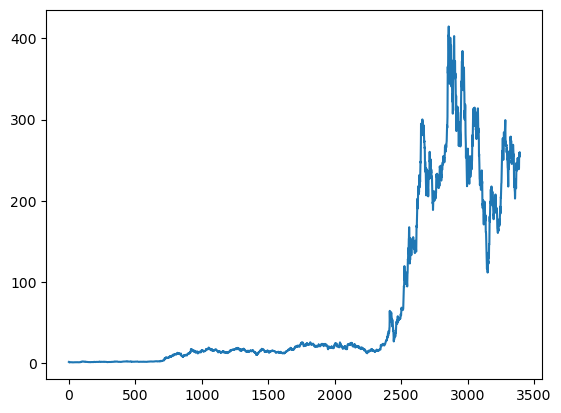

In [10]:
#testing dji
df3 = pd.read_csv("TSLA - Full.csv")

fig, ax = plt.subplots() 

#create days column
days = []
for i in range(len(df3["Date"])):
    days.append(i)
df3.insert(0, "Days", days, True)


#graph data
x = df3["Days"]
y = df3["High"]

ax.plot(x, y)



In [11]:
# Extract features and target variable
X_diji = df3[['Days']]
y_diji = df3['High']


X_valid_poly= poly.transform(X_diji)

# Make predictions
pred_valid = bayesian_ridge.predict(X_valid_poly)

# Evaluate the model
valid_r2 = r2_score(y_diji, pred_valid)
print("Validation R-squared score:", valid_r2)

Validation R-squared score: 0.8612247762777225


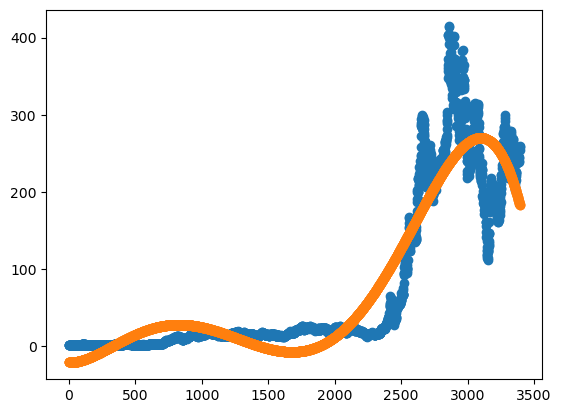

In [12]:
#Graph results
fig, ax = plt.subplots() 
ax.scatter(X_diji, y_diji)
ax.scatter(X_diji, pred_valid)

In [13]:

X_valid_poly= poly.transform(X_nasdaq)

# Make predictions
pred_valid = bayesian_ridge.predict(X_valid_poly)

# Evaluate the model
valid_r2 = r2_score(y_nasdaq, pred_valid)
print("Validation R-squared score:", valid_r2)

Validation R-squared score: 0.8612247762777225


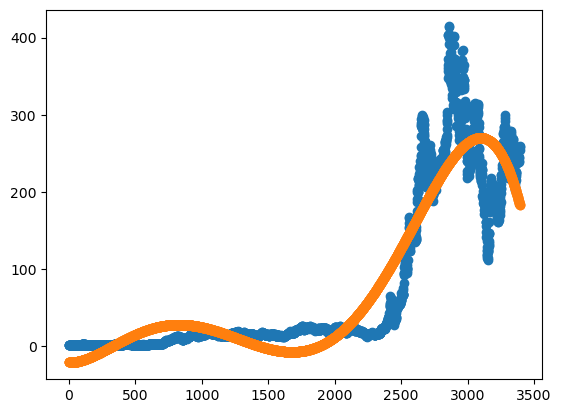

In [14]:
fig, ax = plt.subplots() 
ax.scatter(X_nasdaq, y_nasdaq)
ax.scatter(X_nasdaq, pred_valid)

In [15]:
#Let's try "fine tuning" our model so that it adapts to the new dataset, as the values are signficantly different.
from sklearn.metrics import mean_squared_error 
fine_tuned_model = BayesianRidge(alpha_1=bayesian_ridge.alpha_, lambda_1=bayesian_ridge.lambda_)

X_train_diji, X_valid_diji, y_train_diji, y_valid_diji = train_test_split(X_diji, y_diji, train_size=0.8, test_size=0.2, random_state=0)

X_train_diji_poly = poly.fit_transform(X_train_diji)
X_valid_diji_poly= poly.transform(X_valid_diji)

# # Initialize and train the Bayesian Ridge regression model
fine_tuned_model.fit(X_train_diji_poly, y_train_diji)

# Make predictions
pred_valid = fine_tuned_model.predict(X_valid_diji_poly)

valid_r2 = r2_score(y_valid_diji, pred_valid)
print(mean_squared_error(y_valid_diji, pred_valid))



1688.6310132371382


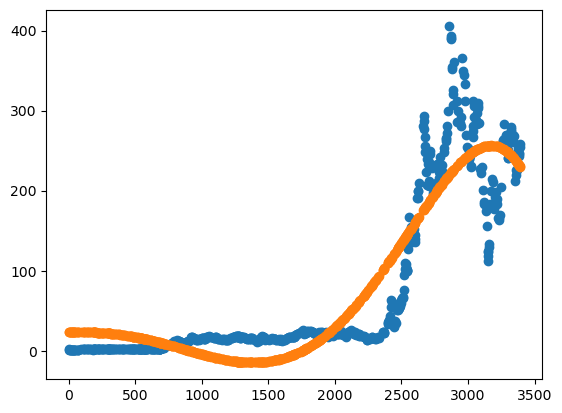

In [16]:
#printing fine tuning model output
fig, ax = plt.subplots() 
ax.scatter(X_valid_diji, y_valid_diji)
ax.scatter(X_valid_diji, pred_valid)

In [17]:
#Lets try again but this time with nasdaq data
fine_tuned_model = BayesianRidge(alpha_1=fine_tuned_model.alpha_, lambda_1=fine_tuned_model.lambda_)
X_train_nasdaq, X_valid_nasdaq, y_train_nasdaq, y_valid_nasdaq = train_test_split(X_nasdaq, y_nasdaq, train_size=0.8, test_size=0.2, random_state=0)

X_train_nasdaq_poly = poly.fit_transform(X_train_diji)
X_valid_nasdaq_poly= poly.transform(X_valid_diji)

# # Initialize and train the Bayesian Ridge regression model
fine_tuned_model.fit(X_train_nasdaq_poly, y_train_nasdaq)

# Make predictions
pred_valid = fine_tuned_model.predict(X_valid_nasdaq_poly)

valid_r2 = r2_score(y_valid_nasdaq, pred_valid)
print(mean_squared_error(y_valid_nasdaq, pred_valid))
print(r2_score(y_valid_nasdaq, pred_valid))

2075.457206041797
0.8027115126750802


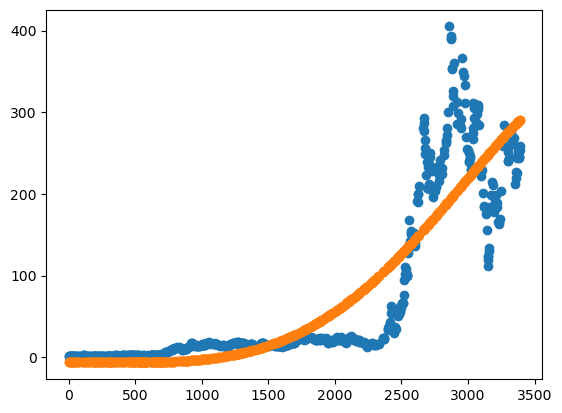

In [18]:
#Graph nasdaq fine-tuning output

fig, ax = plt.subplots() 
ax.scatter(X_valid_nasdaq, y_valid_nasdaq)
ax.scatter(X_valid_nasdaq, pred_valid)

In [19]:
#Lastly let's check if it's still able to predict the original dataset
X_snp = df2[['Days']]
y_snp = df2['High']

X_valid_snp_poly= poly.transform(X_snp)

# Make predictions
pred_valid = fine_tuned_model.predict(X_train_diji_poly)

# Evaluate the model
valid_r2 = r2_score(y_train_diji, pred_valid)
print("Validation R-squared score:", valid_r2)

Validation R-squared score: 0.7756379796230777


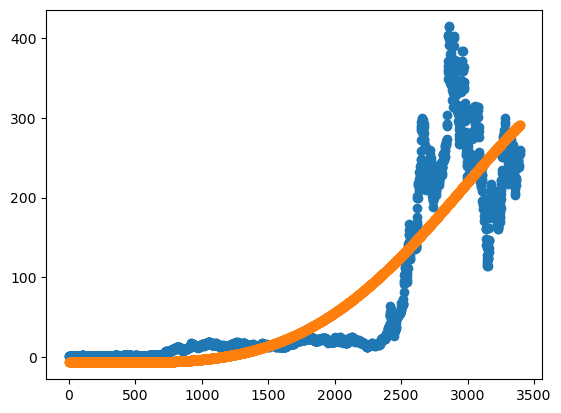

In [20]:
fig, ax = plt.subplots() 
ax.scatter(X_train_diji, y_train_diji)
ax.scatter(X_train_diji, pred_valid)